# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

# read the data
import pandas as pd
# read the data using the pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/DS/used_device_data.csv')

Mounted at /content/drive


## Data Overview

- Observations
- Sanity checks

In [ ]:
# returns the first 5 rows
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


####Observations#####

1.   We have 15 columns and data for the first 5 rows is fetched.



In [ ]:
# return the shape of the data set
df.shape

NameError: ignored

####Observations####

1.   We have 3454 rows and 15 columns in the dataset.



In [ ]:
# Checking the data types of the columns for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

####Observations####

1.  info() returns pandas dataframe and has total of 15 columns .
2.  It is observed there is 9 column(s) with float64 dataype, 2 column(s) with int64 and 4 column(s) with object Data type.
3. In total, info() uses memory usage of 404.9+ KB.
4. There are 4 columns( Column, Non-Null, Count, Dtype) with 15 rows.


In [ ]:
# Statistical summary of the dataset

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


####Observations####

1.   It is observed that average life of battery, screen size, int_memory,  main_camera_mp, selfie_camera_mp is greater than the median indicating the data is slightly positively skewed.
2.   It is observed that mean weight is greater than the median and it is right skewed.
3.   In total, there are 34 unique brand names and 4 different OS versions.
4.   It is observed that RAM, release_year, normalized_used_price, normalized_new_price has mean and median almost equal, so it is symmetric .
5. It is observed that days_used has mean less than median and looks like it is left skewed.



In [ ]:
# Check the NULL values in the dataframe

print (df.isnull().sum())

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64


####Observations####

1.   main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight has missing values .


In [ ]:
# Find the duplicate rows in the data set

dups = df[df.duplicated()]

if dups.empty:
  print ("No duplicates found in the Dataset")
else:
  print (dups)

NameError: ignored

####Observations####

1.   It is observed there are no duplicates in the dataset.



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

## EDA

# Univariate Analysis

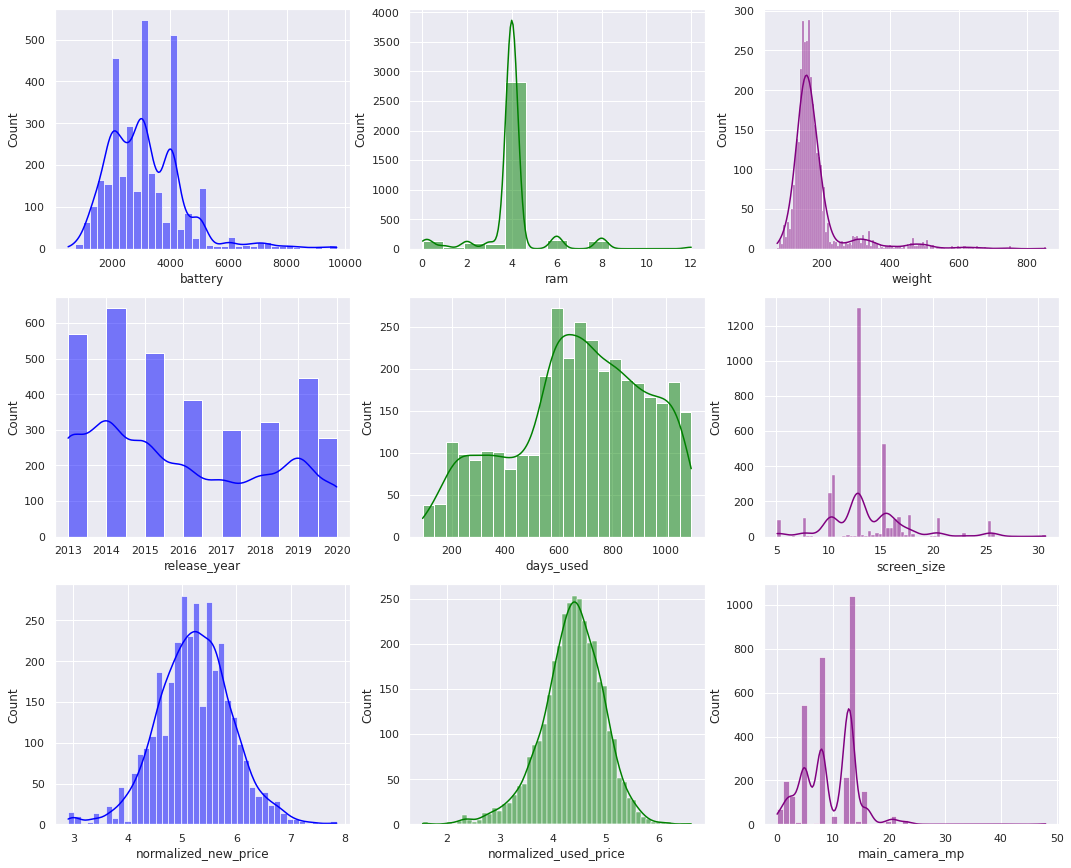

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 3, figsize=(18, 15))

# Below is the histplot used with seaborn library on the X-axis as multiple column names and dataframe 'df'

sns.histplot(data=df, x="battery", kde=True, color="blue", ax=axs[0, 0])
sns.histplot(data=df, x="ram", kde=True, color="green", ax=axs[0, 1])
sns.histplot(data=df, x="weight", kde=True, color="purple", ax=axs[0, 2])
sns.histplot(data=df, x="release_year", kde=True, color="blue", ax=axs[1, 0])
sns.histplot(data=df, x="days_used", kde=True, color="green", ax=axs[1, 1])
sns.histplot(data=df, x="screen_size", kde=True, color="purple", ax=axs[1, 2])
sns.histplot(data=df, x="normalized_new_price", kde=True, color="blue", ax=axs[2, 0])
sns.histplot(data=df, x="normalized_used_price", kde=True, color="green", ax=axs[2, 1])
sns.histplot(data=df, x="main_camera_mp", kde=True, color="purple", ax=axs[2, 2])

####Observations####

1.   It is observed that weight is right skewed and has outliers in the dataset.
2.   It is observed that battery is slightly right skewed distributed with median value around 3000 mAH.
3. It is observed that Normalized price of the used/refurbished device in euros is normally distributed.
4. It is observed that Normalized price of the new device in euros is almost normally distributed.
5. It is observed that days_used for the device is around 600 with data slightly right skewed.
6. It is observed that devices with screen size between 10 to 15 minutes is around 1200 with lot of outliers for the data.
7. It is observed that total devices around 4GB of RAM is between 2500 and 3000.
8. It is observed that maximum number of phones were release in 2014 and data is almost normally distributed.
9. It is observed that average resolution of the camera in megapixel is 9 and there are lot of outliers in the data.  


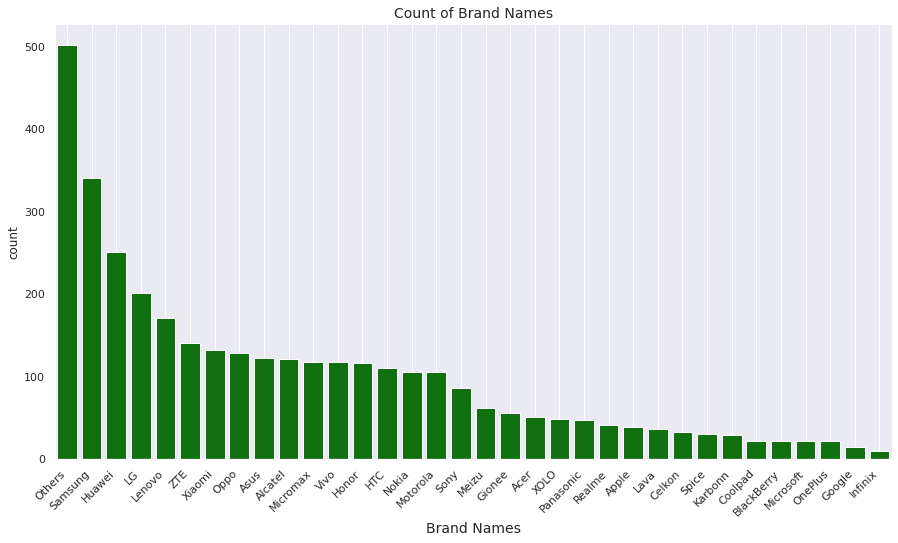

In [ ]:

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns



# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(15,8))

sns.set(style="darkgrid")

# Below is the countplot used with seaborn library on the X-axis as brand_name and dataframe 'df'

sns.countplot(data=df, x='brand_name', color="green", order = df['brand_name'].value_counts().index)

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Brand Names', fontsize=14)
plt.title ('Count of Brand Names', fontsize=14);
plt.grid()

####Observations####

1.   It is observed that others, samsung, Huawei, LG and Lenovo are the popular  brand names used most.
2. The above chart shows the brand names used most in descending order .





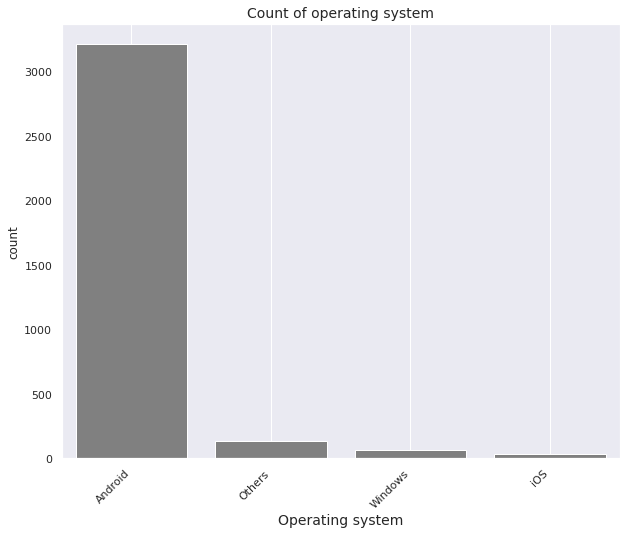

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,8))

sns.set(style="darkgrid")

# Below is the countplot used with seaborn library on the X-axis as os and dataframe 'df'

sns.countplot(data=df, x='os', color="grey", order = df['os'].value_counts().index)

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Operating system', fontsize=14)
plt.title ('Count of operating system', fontsize=14);
plt.grid()

####Observations####

1.   Its is observed that android OS is most widely used as per the dataset.
2.   It is observed that most widely used OS follows as android, Others, windows and iOS.



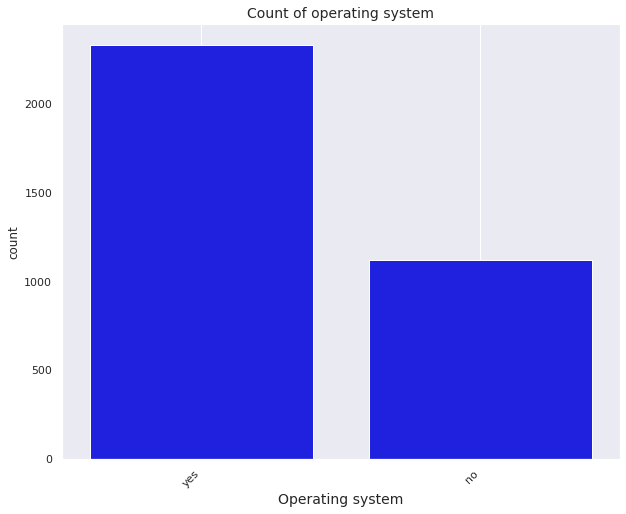

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,8))

sns.set(style="darkgrid")

# Below is the countplot used with seaborn library on the X-axis as 4g column name and dataframe 'df'

sns.countplot(data=df, x="4g", color="blue")

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Operating system', fontsize=14)
plt.title ('Count of operating system', fontsize=14);
plt.grid()


####Observations####

1.   It is observed that 2148 devices have the 4g availability.
2.   It is observed that 1105 devices donot have the 4g availability.



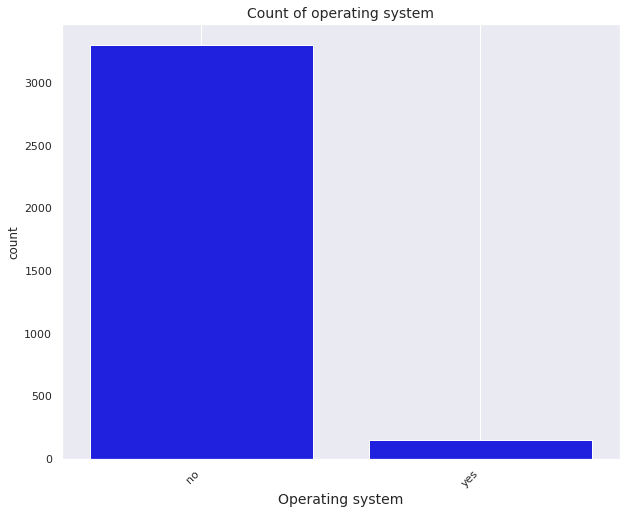

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,8))

sns.set(style="darkgrid")

# Below is the countplot used with seaborn library on the X-axis as 5g column name and dataframe 'df'

sns.countplot(data=df, x="5g", color="blue")

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Operating system', fontsize=14)
plt.title ('Count of operating system', fontsize=14);
plt.grid()

####Observations####

1.   It is observed that 85 devices have the 5g availability.
2.   It is observed that 3168 devices donot have the 5g availability.



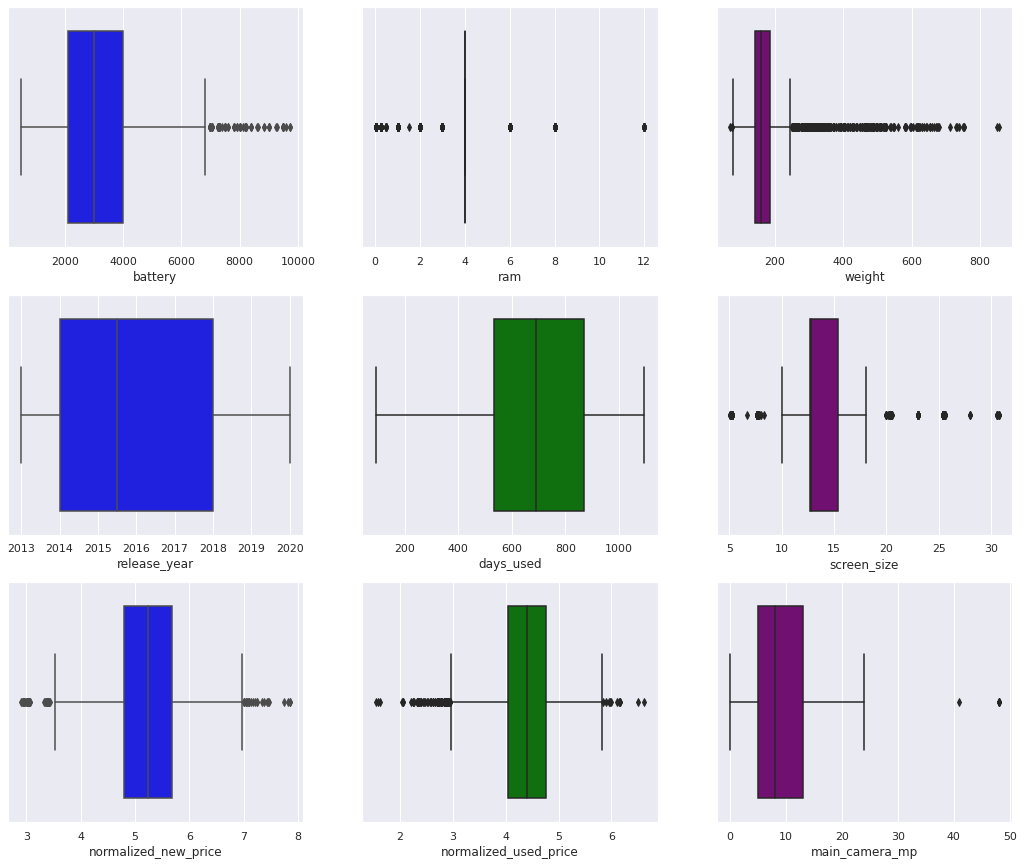

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 3, figsize=(18, 15))

# Below is the boxplot used with seaborn library on the X-axis as multiple column names and dataframe 'df'

sns.boxplot(data=df, x="battery", color="blue", ax=axs[0, 0])
sns.boxplot(data=df, x="ram", color="green", ax=axs[0, 1])
sns.boxplot(data=df, x="weight", color="purple", ax=axs[0, 2])
sns.boxplot(data=df, x="release_year", color="blue", ax=axs[1, 0])
sns.boxplot(data=df, x="days_used", color="green", ax=axs[1, 1])
sns.boxplot(data=df, x="screen_size", color="purple", ax=axs[1, 2])
sns.boxplot(data=df, x="normalized_new_price", color="blue", ax=axs[2, 0])
sns.boxplot(data=df, x="normalized_used_price", color="green", ax=axs[2, 1])
sns.boxplot(data=df, x="main_camera_mp", color="purple", ax=axs[2, 2])

####Observations####

1.   It is observed that weight is right skewed and has outliers in the dataset.
2.   It is observed that battery is slightly right skewed distributed with median value around 3000 mAH.
3. It is observed that Normalized price of the used/refurbished device in euros is normally distributed and has outliers .
4. It is observed that Normalized price of the new device in euros is almost normally distributed and has outliers.
5. It is observed that days_used for the device is around 600 with no outliers .
6. It is observed that devices with screen size between 10 to 15 minutes is around 1200 with lot of outliers for the data.
7. It is observed that total devices around 4GB of RAM is between 2500 and 3000.
8. It is observed that maximum number of phones were release in 2014 and data is almost normally distributed.
9. It is observed that average resolution of the camera in megapixel is 9 and there are few of outliers in the data.  

# Bivariate Analysis

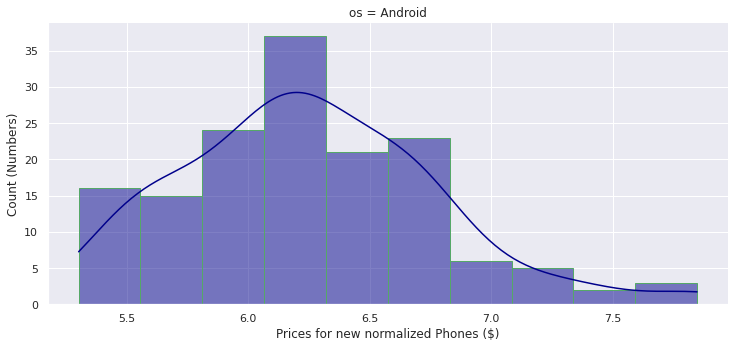

In [ ]:
''' Find out which OS , has the latest technology related to 4g (and) 5g '''

g = sns.FacetGrid(df[ (df['4g'] == "yes") & (df['5g'] == "yes") ], height=5, aspect=2, col_wrap=2, col='os');
g.map(sns.histplot, 'normalized_new_price', edgecolor="g", color = "darkblue", kde = True);
g.set_axis_labels("Prices for new normalized Phones ($)", "Count (Numbers)");

####Observations####

1.   Only android devices have the 4g and 5g facility for the new normalized price at an average of approximately 6 euros.



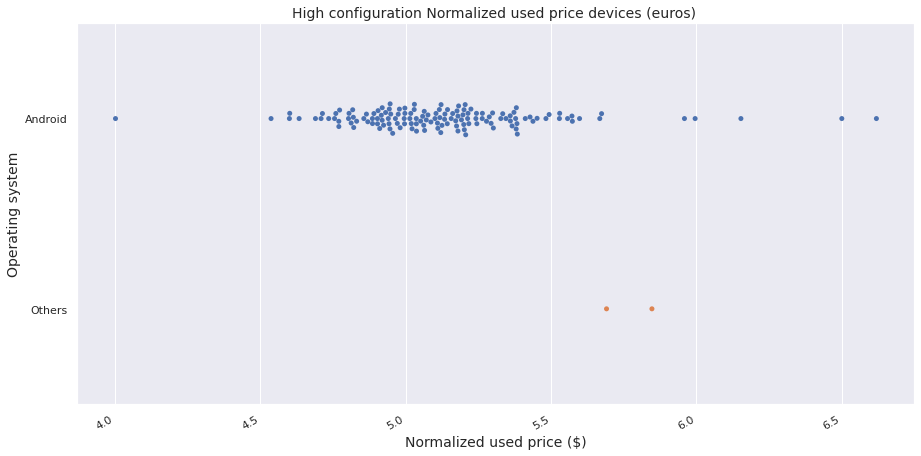

In [ ]:
''' Find out which OS, has higher configuration  and above the mean value and with respect to normalized new price '''


df_os_new_price = df[(df['screen_size'] > 13) & (df['main_camera_mp'] > 9) & (df['selfie_camera_mp'] > 6) & (df['int_memory'] > 54) &
            (df['ram'] > 4) & (df['battery'] > 3133)  ]

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(15,7))

# xticks is used to rotate the x label

plt.xticks(rotation= 30, ha='right');

# Below is the swarmplot used with seaborn library on the X-axis as 'normalized used price and Y-axis as 'OS' and dataframe 'df'

sns.swarmplot(data=df_os_new_price,  x='normalized_used_price', y='os', dodge=True);

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Normalized used price ($)', fontsize=14)
plt.ylabel('Operating system', fontsize=14)
plt.title ('High configuration Normalized used price devices (euros) ', fontsize=14);



####Observations####

1.   It is observed that with high end configuration for the devices which is in demand  for the data set are only the android  devices.
2.   It is observed that most of the android high end configuration are available for the used devices are  available around 5 euros.
3.   It is observed that only 2 devices are present with others as operating system.
4.   It is observed that not other operation system have this high end configuration.


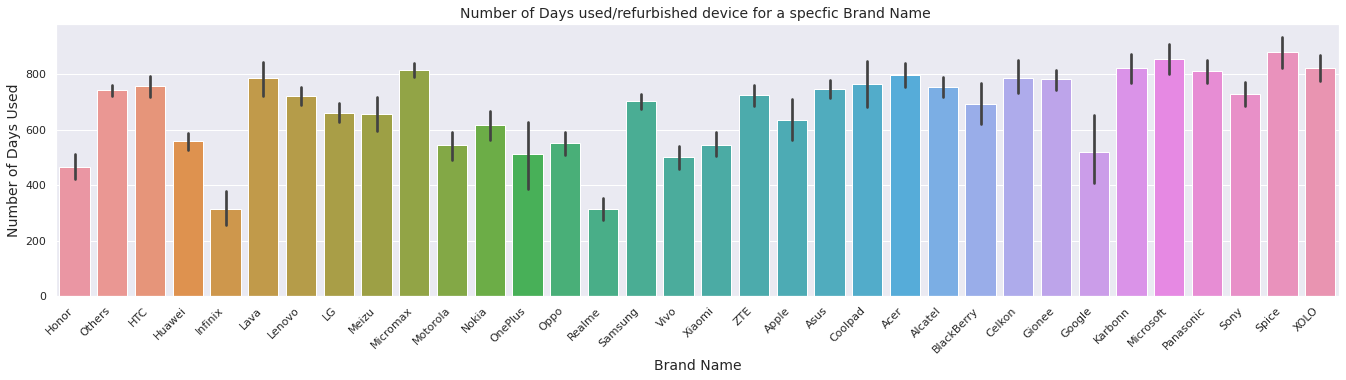

In [ ]:
''' Find out which brands ,are used/refurbished device most  '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(23,5))

# Below is the barplot used with seaborn library on the X-axis as 'brand name' and Y-axis as 'days_used' and dataframe 'df'

sns.barplot(data=df, x='brand_name', y='days_used');

# xticks is used to rotate the x label

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Brand Name', fontsize=14)
plt.ylabel('Number of Days Used', fontsize=14)
plt.title ('Number of Days used/refurbished device for a specfic Brand Name ', fontsize=14);

####Observations####

1.   It is observed that Spice, Microsoft, Panasonic, XOLO, Micromax are the most used brand names for the refurbushied list of devices.




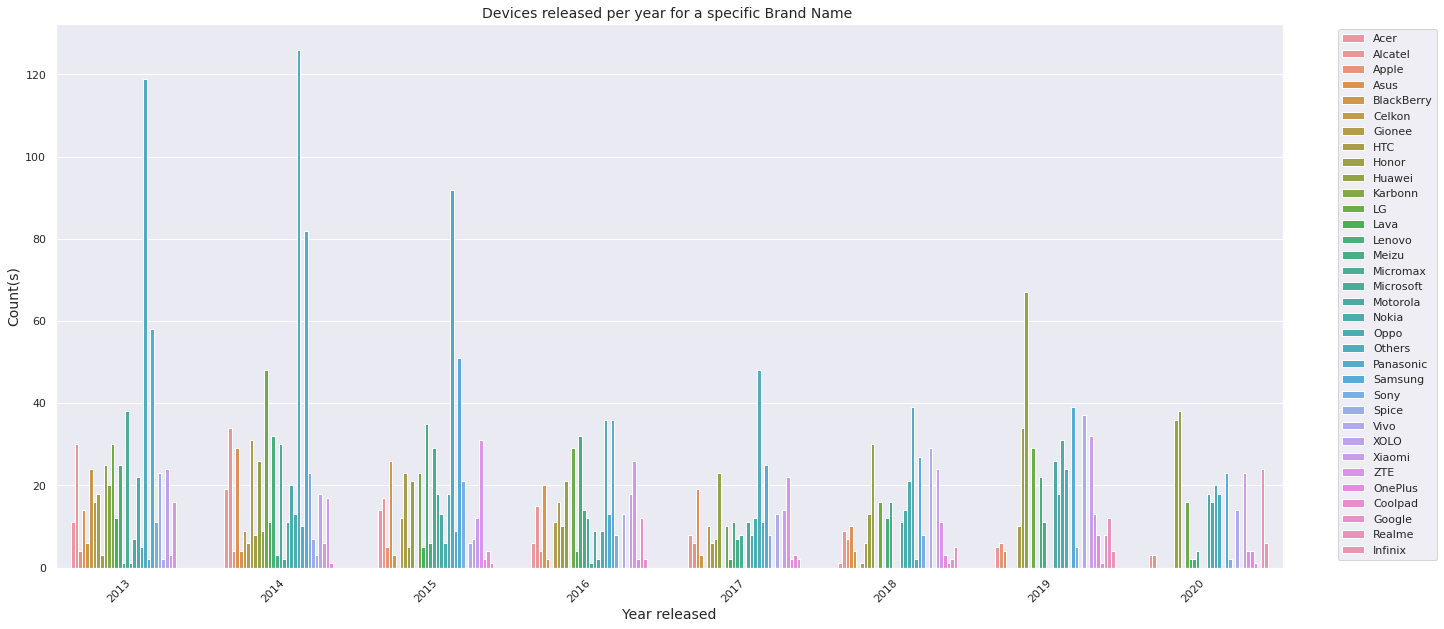

In [ ]:
''' Find out which brands ,are released on yearly basis and its count(s)  '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(22,10))

# Below is the barplot used with seaborn library on the X-axis as 'release_year' and Y-axis as 'counts' and hue on the 'brand_name ' and  dataframe 'df'

df_release_year = df.groupby(['release_year', 'brand_name']).size().reset_index()
df_release_year.columns=['release_year','brand_name','counts']

df_release_year_counts = df_release_year.sort_values(by=['release_year','brand_name'],ascending = [True,True])


sns.barplot(data=df_release_year_counts, x='release_year', y='counts', hue='brand_name');


# xticks is used to rotate the x label

plt.legend(bbox_to_anchor=(1.04, 1.0), loc='upper left')
plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Year released', fontsize=14)
plt.ylabel('Count(s)', fontsize=14)
plt.title ('Devices released per year for a specific Brand Name ', fontsize=14);

####Observations####

1.   In 2013, the top 2  count of devices were others --> 119, samsung --> 58
2.   In 2014, the top 2 count of devices were others -->126, samsung --> 82
3.   In 2015, the top 2 count of devices were  others --> 92, samsung --> 51
4.   In 2016, the top count of devices were others --> 36 , samsung --> 36
5.   In 2017, the top 2 count of devices were  others --> 48, samsung --> 25
6.   In 2018, the top 2 count of devices were others --> 39, Huawei --> 30
7.   In 2019, the top 2 count of devices were Huawei --> 67, samsung --> 39
8.   In 2020, the top 2 count of devices were Huawei --> 38, Honor --> 36



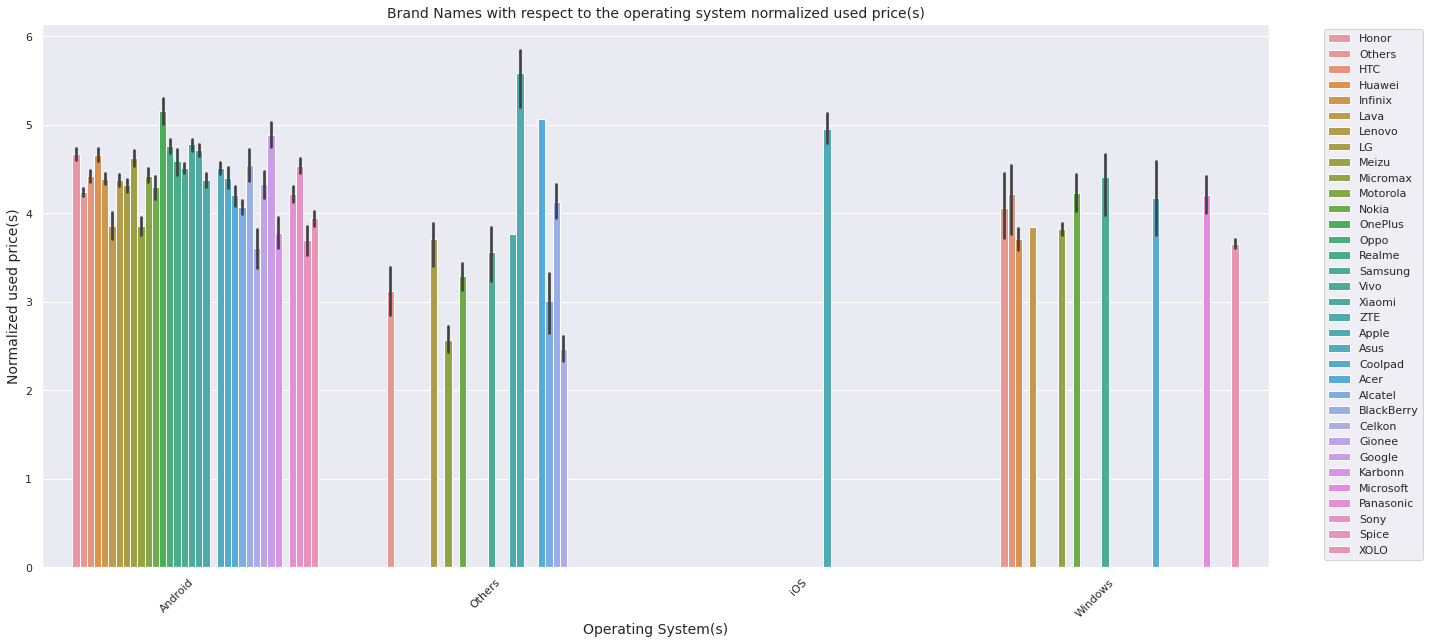

In [ ]:
''' Find out which OS has the brand names ,and its respective used price  '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(22,10))

# Below is the barplot used with seaborn library on the X-axis as 'os' and Y-axis as 'normalized used price' and hue on the 'brand_name ' and  dataframe 'df'

sns.barplot(data=df, x='os', y='normalized_used_price', hue='brand_name');

# xticks is used to rotate the x label

plt.legend(bbox_to_anchor=(1.04, 1.0), loc='upper left')
plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Operating System(s)', fontsize=14)
plt.ylabel('Normalized used price(s)', fontsize=14)
plt.title ('Brand Names with respect to the operating system normalized used price(s)', fontsize=14);

####Observations####

1.   Android OS has the highest number of brand_Names or the devices with price range between ~4-5 euros.
2.   Windows OS has the second highest number of brand names or the devices with price range between ~4-5 euros.



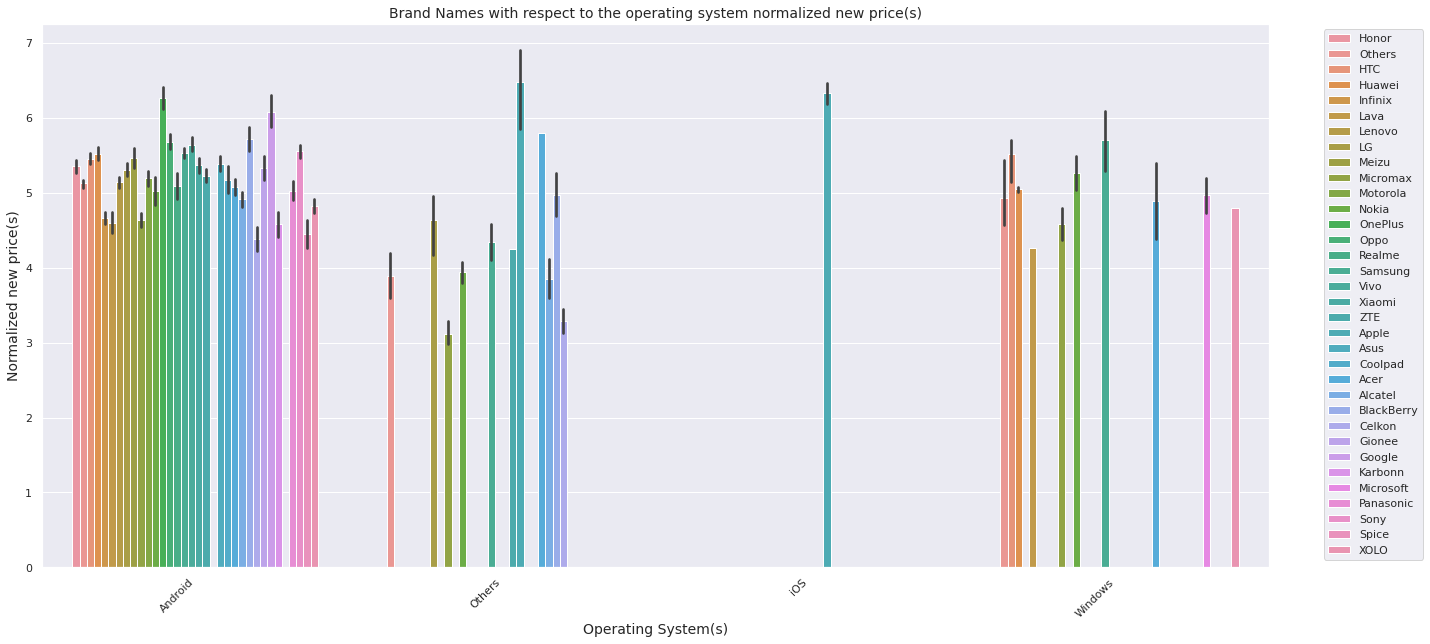

In [ ]:
''' Find out which OS has the brand names ,and its respective new price  '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(22,10))

# Below is the barplot used with seaborn library on the X-axis as 'os' and Y-axis as 'normalized new price' and hue on the 'brand_name ' and  dataframe 'df'

sns.barplot(data=df, x='os', y='normalized_new_price', hue='brand_name');

# xticks is used to rotate the x label

plt.legend(bbox_to_anchor=(1.04, 1.0), loc='upper left')
plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Operating System(s)', fontsize=14)
plt.ylabel('Normalized new price(s)', fontsize=14)
plt.title ('Brand Names with respect to the operating system normalized new price(s)', fontsize=14);

####Observations####

1.   Android OS has the highest number of brand_Names or the devices with price range between ~5-7 euros.
2.   Windows OS has the second highest number of brand names or the devices with price range between ~4-6 euros.

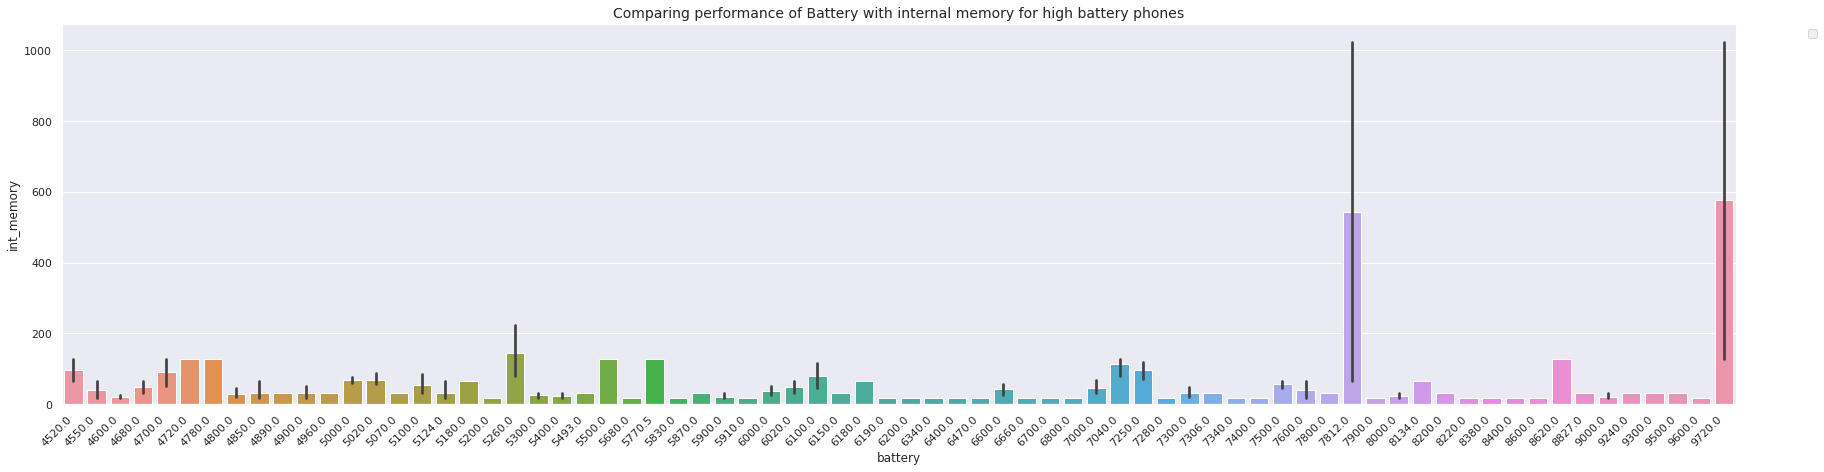

In [ ]:
''' Find out if there is any impact of battery with the internal memory '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(30,7))

# Below is the barplot used with seaborn library on the X-axis as 'os' and Y-axis as 'Battery' and hue on the 'int_memory ' and  dataframe 'df'

df_battery_gt_mean = df[df["battery"] > 4500]

sns.barplot(data=df_battery_gt_mean, x="battery", y = "int_memory")

# xticks is used to rotate the x label

plt.legend(bbox_to_anchor=(1.04, 1.0), loc='upper left')
plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.title ('Comparing performance of Battery with internal memory for high battery phones', fontsize=14);


####Observations####


1. Its is observed that battery  is very low correlated with the other int_memory. It doesnt signify that with high battery there will be any impact on the memory.

# 1. What does the distribution of normalized used device prices look like?

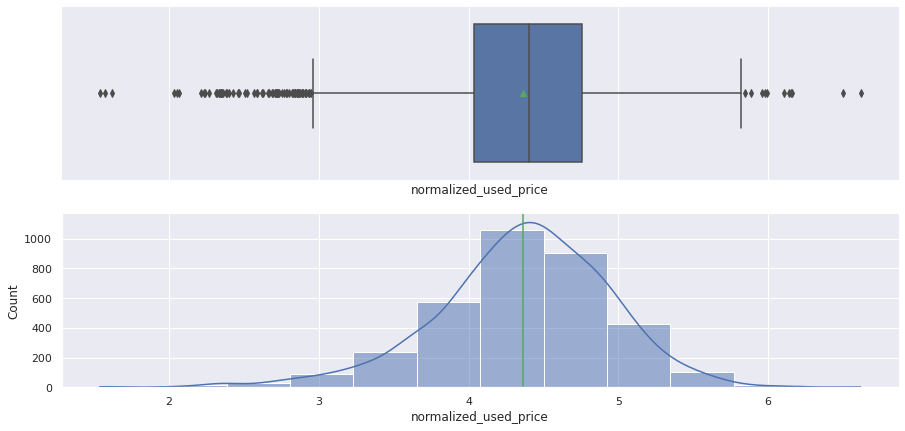

In [ ]:

# Import necessary libraries for vizualization and manipulation

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Below method is used to display both the boxplot and histplot on the normalized_used_price column on the df dataframe

f, (ax_box, ax_hist) = plt.subplots(2, figsize=(15, 7),sharex=True, gridspec_kw={"height_ratios": (0.5, 0.5)})

sns.boxplot(x=df['normalized_used_price'],  showmeans=True, ax=ax_box)

sns.histplot(x=df['normalized_used_price'], bins=12, kde=True, stat='count', ax=ax_hist)
ax_hist.axvline(np.mean(df['normalized_used_price']),color='g',linestyle='-')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)



####Observations####

1.   It is observed that normalized_used_price for the used devices is ~ 4.3 euros.
2. It is observed that data is almost normally distributed.
3. It is observed that outliers are displayed for the normalized_used_price .
4. It is observed that around 1100 devices have average normalized_used_price as ~4.3 euros.





# 2. What percentage of the used device market is dominated by Android devices?

        os  counts_of_used_devices  Percent_of_used_device(s)
0  Android                    3214                  93.051534
1   Others                     137                   3.966416
2  Windows                      67                   1.939780
3      iOS                      36                   1.042270


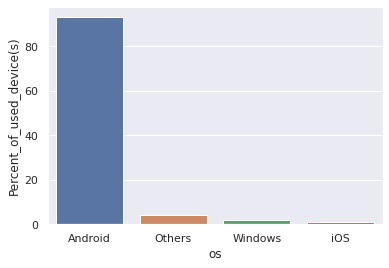

In [ ]:
# Import necessary libraries for vizualization and manipulation

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_used_device_android = df.groupby(['os'])['normalized_used_price'].size().reset_index()
df_used_device_android.columns = ['os','counts_of_used_devices']

df_used_device_android['Percent_of_used_device(s)'] = (df_used_device_android['counts_of_used_devices'] /
                  df_used_device_android['counts_of_used_devices'].sum()) * 100

print (df_used_device_android)

sns.barplot(data = df_used_device_android, x = 'os', y = 'Percent_of_used_device(s)')


####Observations####

1.   It is observed that  93.1% of used device market is dominated by Android devices.




# 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

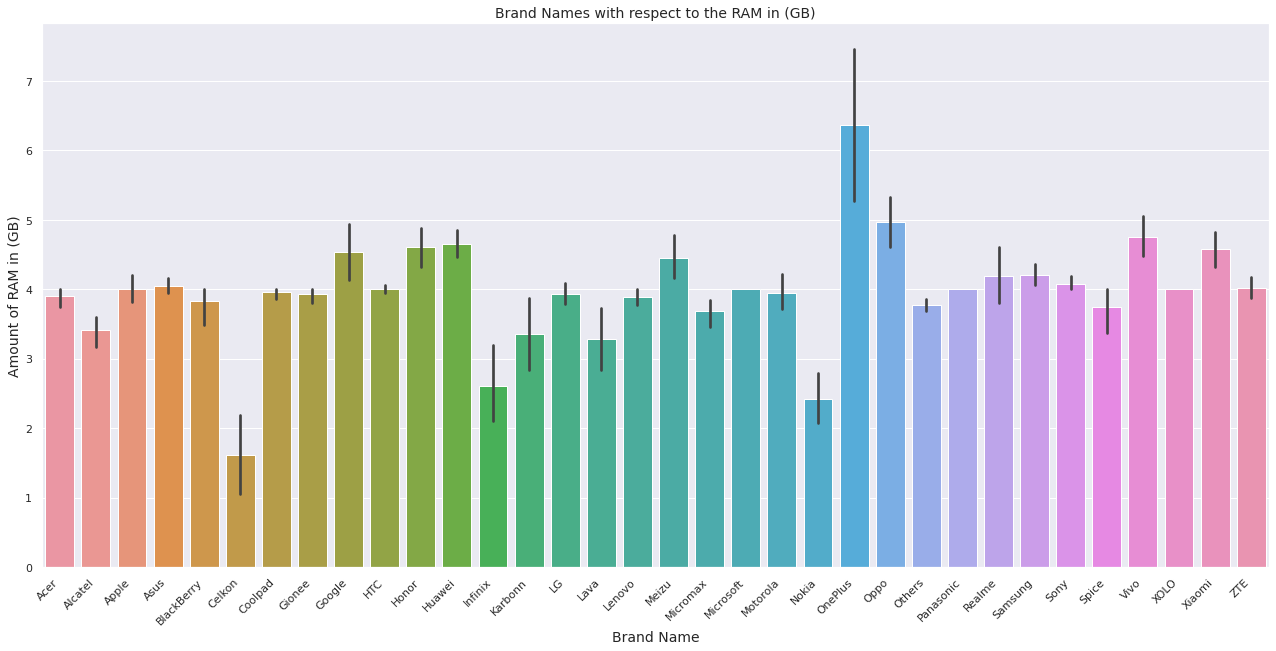

In [ ]:
''' Find out  amount of RAM vary with the brand '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(22,10))

# Below is the barplot used with seaborn library on the X-axis as 'brand_name' and Y-axis as 'RAM' and   dataframe 'df'

sns.barplot(data=df.sort_values("brand_name", ascending=True), x='brand_name', y='ram');

# xticks is used to rotate the x label

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Brand Name', fontsize=14)
plt.ylabel('Amount of RAM in (GB)', fontsize=14)
plt.title ('Brand Names with respect to the RAM in (GB)', fontsize=14);

####Observations####

1.   It is observed that OnePlus brand has the highest RAM between 6-7 GB.
2.   It is observed that average RAM size is around 4 GB in size across all brands.



# 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

<Figure size 1584x720 with 0 Axes>

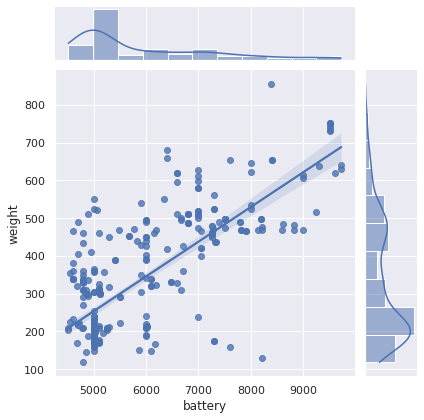

In [ ]:
''' Find out  the weight vary for phones and tablets offering large batteries (more than 4500 mAh) '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(22,10))

# Below is the jointplot used with seaborn library on the X-axis as 'battery' and Y-axis as 'weight' and   dataframe 'df'

df_large_batteries = df[df['battery']>4500]

sns.jointplot(data=df_large_batteries, x='battery', y='weight', kind='reg');


####Observations####

1.   It is observed that  the  weight proportionally increases as the battery weight is greater than 4500 mAh.




# 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

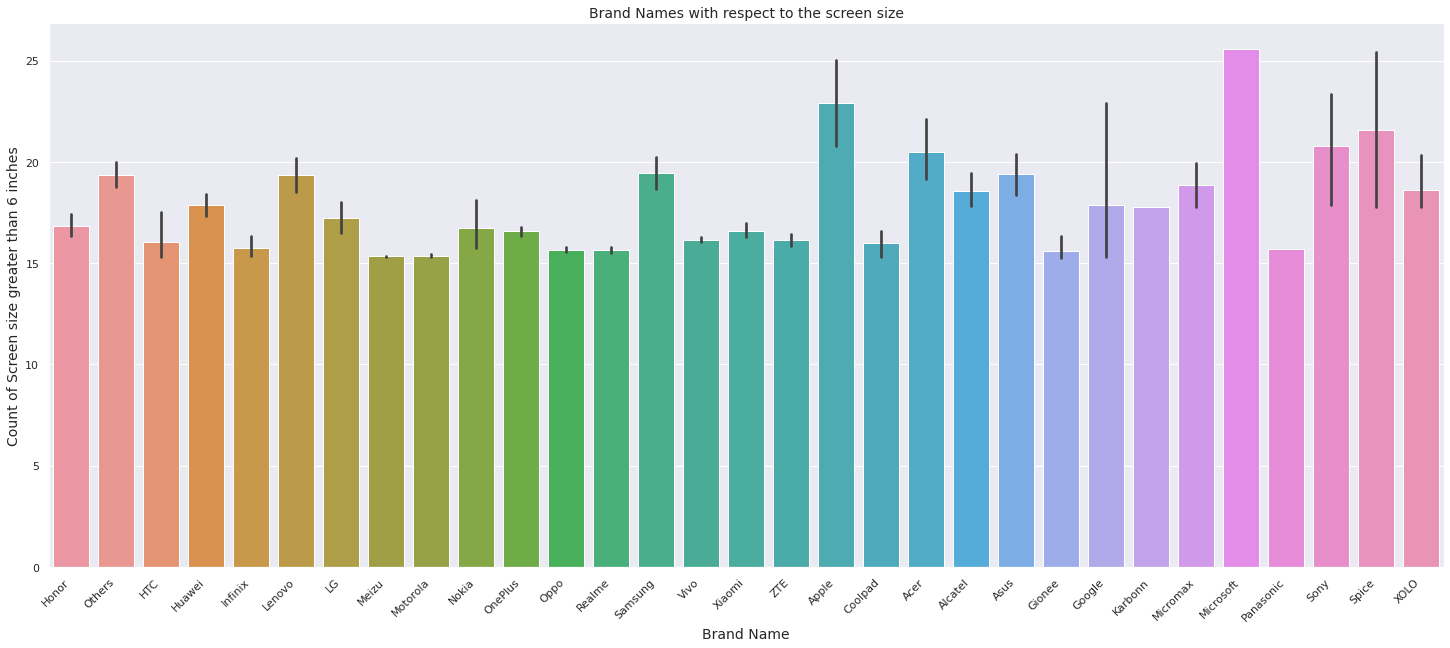

In [ ]:
''' Find out  phones and tablets are available across different brands with a screen size larger than 6 inches '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(25,10))

# Below is the barplot used with seaborn library on the X-axis as 'brand_name' and Y-axis as 'screen_size' and   dataframe 'df'

df_large_large_screen_size = df[df['screen_size']>15.24]


sns.barplot(data=df_large_large_screen_size, x='brand_name', y='screen_size')


# xticks is used to rotate the x label

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Brand Name', fontsize=14)
plt.ylabel('Count of Screen size greater than 6 inches', fontsize=14)
plt.title ('Brand Names with respect to the screen size', fontsize=14);


####Observations####

1.   It is observed that Microsoft, Apple, Spice, Spice, Acer, XOLO brands have the highest number of devices with screen size greater than 6 inches.
2.   It is onserved that Motorola, Meizu have the least number of devices with screen size greater than 6 inches.



# 6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

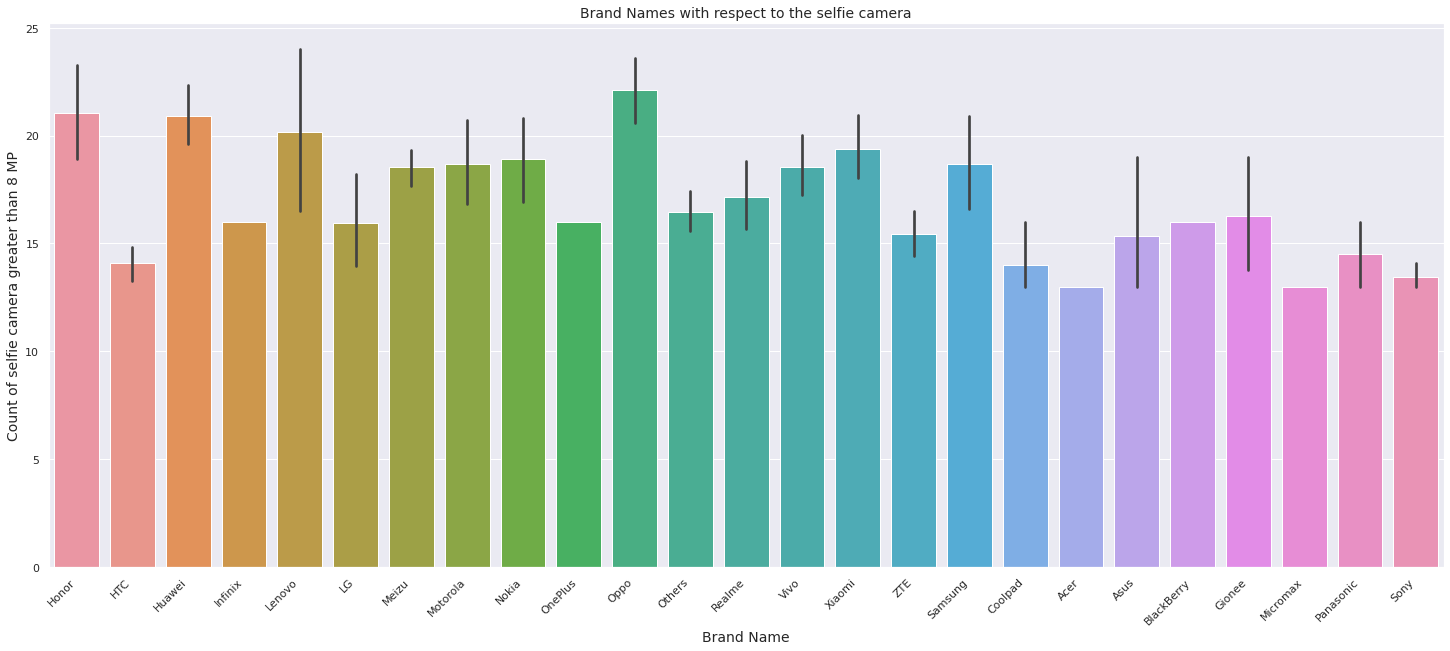

In [ ]:
''' Find out  distribution of devices offering greater than 8MP selfie cameras across brands '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(25,10))

# Below is the barplot used with seaborn library on the X-axis as 'brand_name' and Y-axis as 'selfie_camera_mp' and   dataframe 'df'

df_large_selfie_camera = df[df['selfie_camera_mp']>8]

sns.barplot(data=df_large_selfie_camera, x='brand_name', y='selfie_camera_mp')


# xticks is used to rotate the x label

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Brand Name', fontsize=14)
plt.ylabel('Count of selfie camera greater than 8 MP', fontsize=14)
plt.title ('Brand Names with respect to the selfie camera', fontsize=14);

####Observations####

1.   It is observed that OPPO, Honor, Huawei, Lenovo, Xiamoi have selfie cameras have greater than 8 MP.
2.   It is observed that HTC, Acer, Micromax, sony, Coolpad have the least number of devices having camera greater than 8 MP.



# 7. Which attributes are highly correlated with the normalized price of a used device?

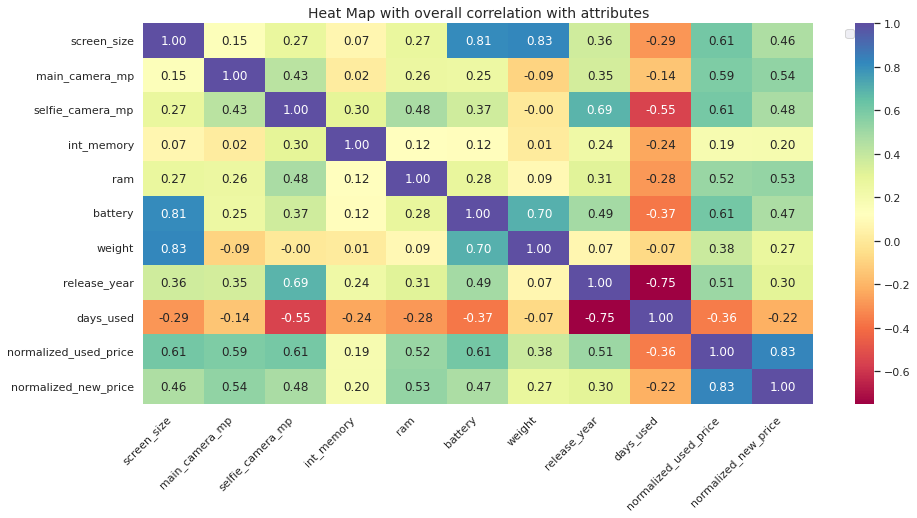

In [ ]:
''' Find out which OS has the brand names ,and its respective  price  '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(15,7))

# Below is the heatmap used with seaborn library on correlating the relation between different attributes  and  dataframe 'df'

sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="Spectral")

# xticks is used to rotate the x label

plt.legend(bbox_to_anchor=(1.04, 1.0), loc='upper left')
plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.title ('Heat Map with overall correlation with attributes', fontsize=14);

####Observations####

1. Its is observed that normalized_new_price is moderaltely correlated with the other key attributes like ram, main_camera_mp .

2. It is observed that normalized_new_price is weakly correlated with other attributes like int_memory, weight .

3. Its is observed that normalized_new_price is highly correlated with normalized_used_price which signifies that higher the new price , it seems used price tend to increase.

4. It is observed that normalized_used_price is moderately correlated with ram and selfie_camera_mp, screen_size signifies the higher the phone ram or selfie camera pixels the higher the price of the used phone.

5. It is observed that normalized_used_price is negatively correlated with days_used meaning the longer the duration the phone was used the lower the price of such used phone.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Missing value treatment**

In [ ]:
# Check the NULL values in the dataframe

print (df.isnull().sum())

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64


####Observations####

1. For attributes main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight have missing values.
2. we will impute the missing values in each column with the median values.



In [ ]:
# we first create a copy of the data to avoid changes to it
df1 = df.copy()

In [ ]:
# Filling the mising values in the number column with the median

df1['main_camera_mp']= df1['main_camera_mp'].fillna(df1['main_camera_mp'].median())

df1['selfie_camera_mp']= df1['selfie_camera_mp'].fillna(df1['selfie_camera_mp'].median())

df1['int_memory']= df1['int_memory'].fillna(df1['int_memory'].median())

df1['ram']= df1['ram'].fillna(df1['ram'].median())

df1['battery']= df1['battery'].fillna(df1['battery'].median())

df1['weight']= df1['weight'].fillna(df1['weight'].median())

print (df1.isnull().sum())

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64


####Observations####

1.   For all the columns with missing values, median values are replaced and now we donot have any missing data .




**Outlier detection and treatment**

In [ ]:
''' From EDA - Bivariate analysis we have observed there are outliers for the numeric columns,
    we can either treat the Outliers with the below methods:

    1. Z - Score
    2. IQR

'''
def treat_outliers(df1, col):
    Q1 = df1[col].quantile(0.25)  # 25th quantile
    Q3 = df1[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    low_whis = Q1 - 1.5 * IQR
    up_whis = Q3 + 1.5 * IQR

    # Here , all the values which are less than  low_whis will be assigned the value of low_whis
    # Here , all the values which are greater than up_whis will be assigned the value of up_whis

    df1[col] = np.clip(df1[col], low_whis, up_whis)

    return df1


def treat_outliers_all(df1, col_list):
    """
    In this method, we will treat all the outliers
    for all the numerical columns
    """
    for c in col_list:
        df1 = treat_outliers(df1, c)

    return df1

In [ ]:
# Here we will call this method for treating the outliers
numerical_col = df1.select_dtypes(include=np.number).columns.tolist()
df1 = treat_outliers_all(df1, numerical_col)

['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_used_price', 'normalized_new_price']


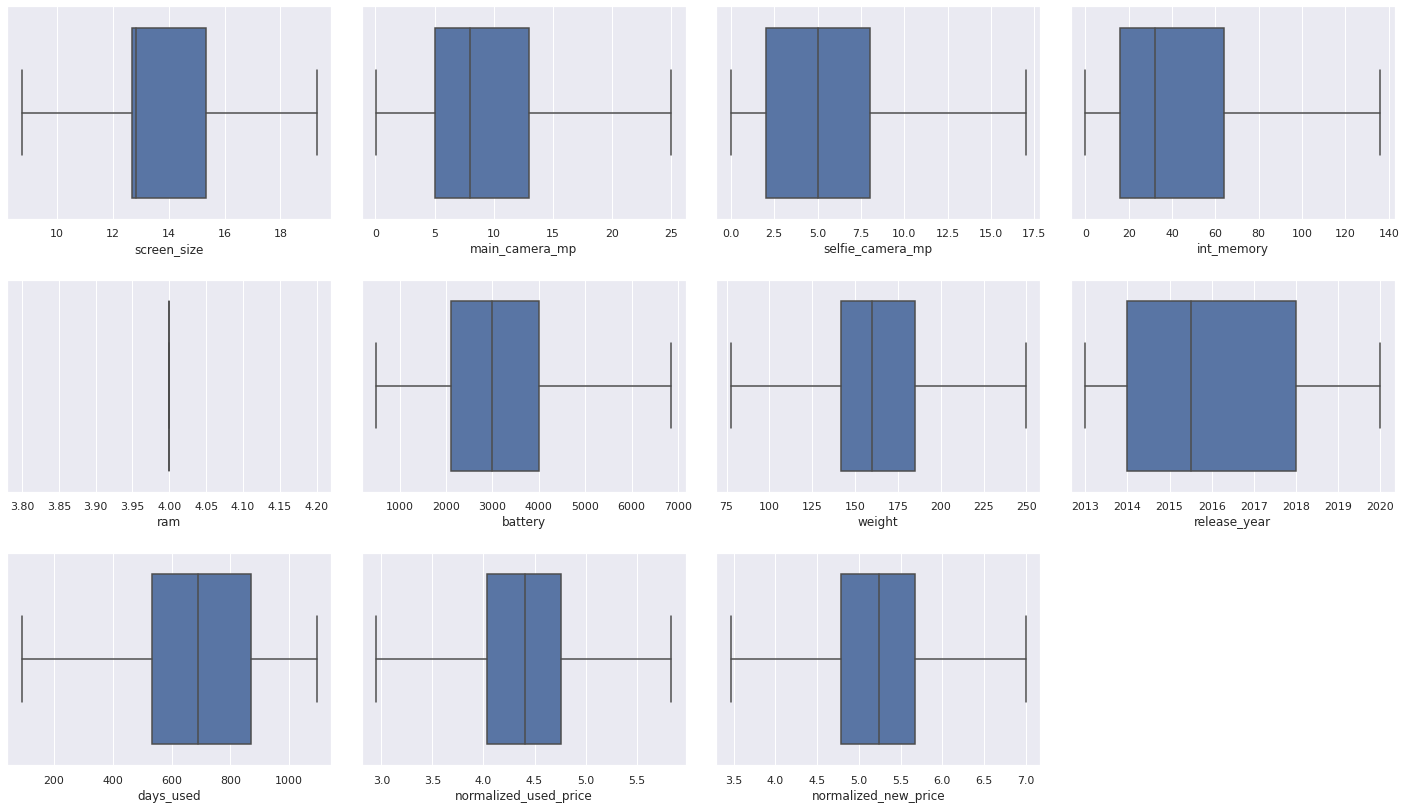

In [ ]:
# outlier treatment after using the IQR method using boxplot and validating if any Outliers

num_cols = df1.select_dtypes(include=np.number).columns.tolist()
print (num_cols)

plt.figure(figsize=(20, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df1, x=variable, whis=1.5)
    plt.tight_layout(pad=2)

plt.show()

####Observations####

1.   Earlier, It was observed that, outliers are present for all the column except release_year and days_used.
2.   Now, we can see there  are no outliers after the IQR method is used.



# It is a good idea to explore the data once again after manipulating it.

# 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

<Figure size 1584x720 with 0 Axes>

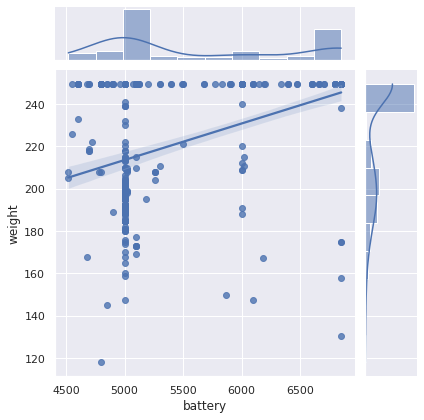

In [ ]:
''' Find out  the weight vary for phones and tablets offering large batteries (more than 4500 mAh) '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(22,10))

# Below is the jointplot used with seaborn library on the X-axis as 'battery' and Y-axis as 'weight' and   dataframe 'df'

df_large_batteries = df1[df1['battery']>4500]

sns.jointplot(data=df_large_batteries, x='battery', y='weight', kind='reg');

####Observations####

1. It is observed that after the removal of outliers the correlation between the battery and weight is now 0.75 which was previously 0.70

# 7. Which attributes are highly correlated with the normalized price of a used device?


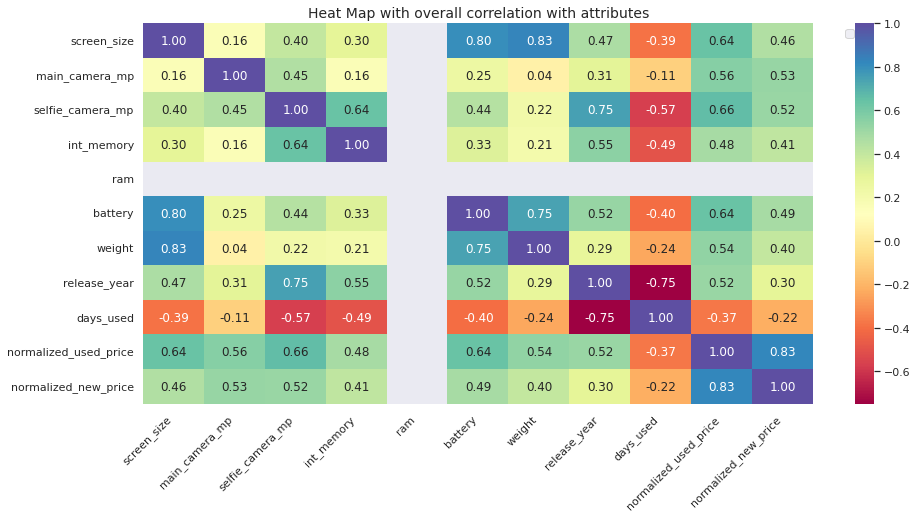

In [ ]:
''' Find out which OS has the brand names ,and its respective  price  '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(15,7))

# Below is the heatmap used with seaborn library on correlating the relation between different attributes  and  dataframe 'df1'

numeric_columns = df1.select_dtypes(include=np.number).columns.to_list()
sns.heatmap(df1[numeric_columns].corr(), annot=True, fmt=".2f", cmap="Spectral")

# xticks is used to rotate the x label

plt.legend(bbox_to_anchor=(1.04, 1.0), loc='upper left')
plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.title ('Heat Map with overall correlation with attributes', fontsize=14);

####Observations#####

1. From the above boxplot and heat map observations, We will ignore "RAM" column as most of the  data has a constant RAM of 4GB .

# 1. What does the distribution of normalized used device prices look like?

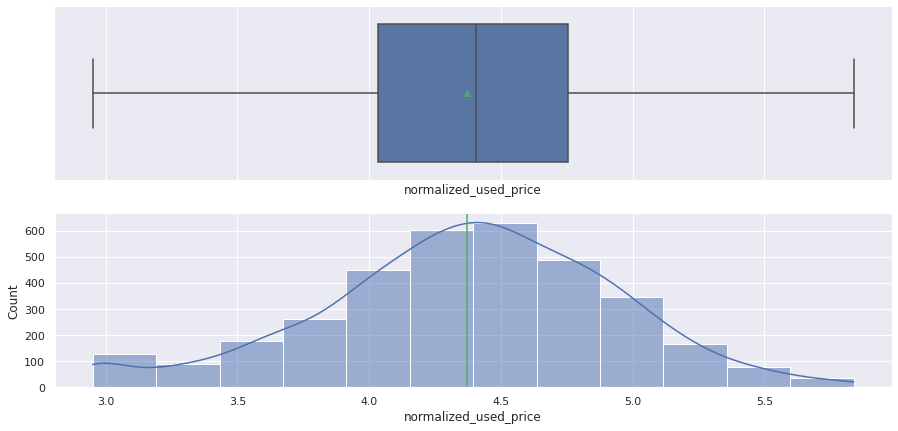

In [ ]:

# Import necessary libraries for vizualization and manipulation

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Below method is used to display both the boxplot and histplot on the normalized_used_price column on the df dataframe

f, (ax_box, ax_hist) = plt.subplots(2, figsize=(15, 7),sharex=True, gridspec_kw={"height_ratios": (0.5, 0.5)})

sns.boxplot(x=df1['normalized_used_price'],  showmeans=True, ax=ax_box)

sns.histplot(x=df1['normalized_used_price'], bins=12, kde=True, stat='count', ax=ax_hist)
ax_hist.axvline(np.mean(df1['normalized_used_price']),color='g',linestyle='-')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Observations:

1.   It is observed that normalized_used_price for the used devices is ~ 4.3 euros.
2.   It is observed that data is almost normally distributed.
3.   It is observed that outliers are no displayed for the normalized_used_price .
4.   It is observed that even after the outlier removal the average used price didnt change.  



# 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

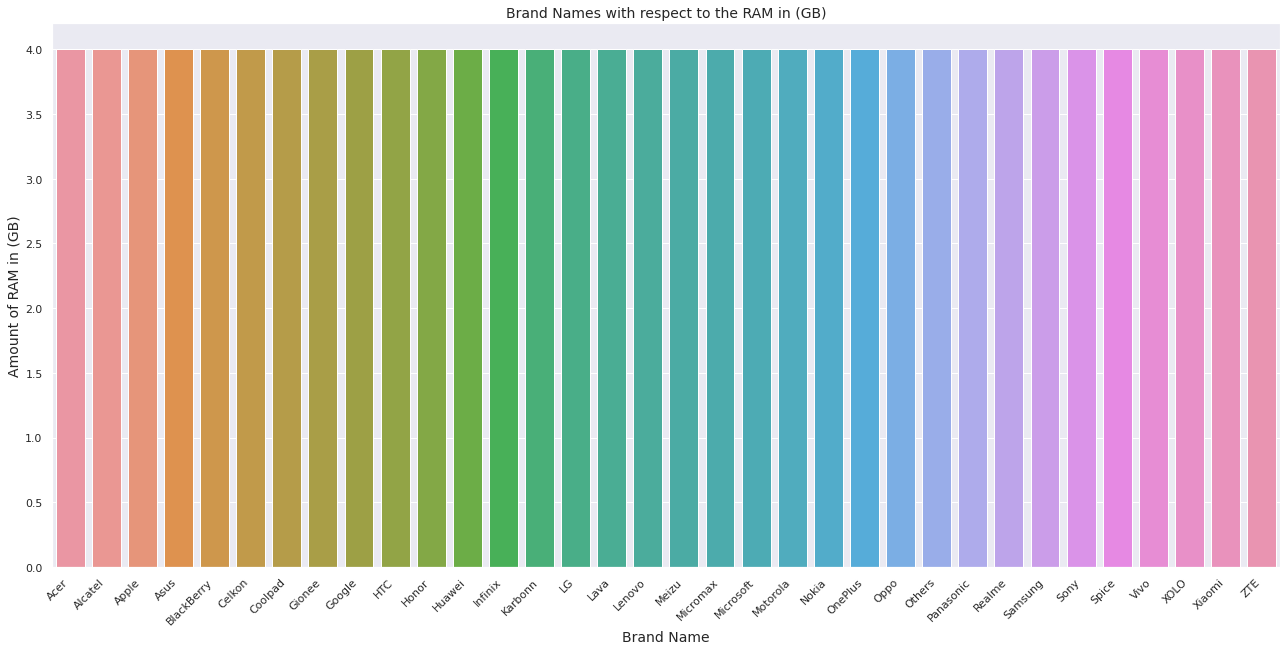

In [ ]:
''' Find out  amount of RAM vary with the brand '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(22,10))

# Below is the barplot used with seaborn library on the X-axis as 'brand_name' and Y-axis as 'RAM' and   dataframe 'df'

sns.barplot(data=df1.sort_values("brand_name", ascending=True), x='brand_name', y='ram');

# xticks is used to rotate the x label

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Brand Name', fontsize=14)
plt.ylabel('Amount of RAM in (GB)', fontsize=14)
plt.title ('Brand Names with respect to the RAM in (GB)', fontsize=14);

####Observations####

1. It is observed that after the outlier treatment average RAM size is 4 GB across all brands.

**Future Engineering**

## Model Building - Linear Regression

In [ ]:
# defining X and y variables

X = df1.drop(["normalized_used_price","ram"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        19.30  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  battery  weight  release_year  days_used  \
0               5.0        64.0   3020.0   146.0          2020        127   
1              16.0       128.0   4300.0   213.0          2020        325   
2               8.0       128.0   4200.0   213.0          2020        162   
3               8.0        64.0   6850.0   249.5          2020        345   
4               8.0        64.0   5000.0   185.0          2020        293   

   normalized_new_price  
0              4.715100  
1              5.519018  
2              5.884631  
3              5.630961  
4              4.94783

In [ ]:
# encoding categorical variables

X = pd.get_dummies(X, columns=X.select_dtypes(include=["object","category"]).columns.to_list(), \
    drop_first=True)

print(X.shape)
X.head()

(3454, 47)


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,release_year,days_used,normalized_new_price,brand_name_Alcatel,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3020.0,146.0,2020,127,4.715100,0,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,4300.0,213.0,2020,325,5.519018,0,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,4200.0,213.0,2020,162,5.884631,0,...,0,0,0,0,0,0,0,0,1,1
3,19.30,13.0,8.0,64.0,6850.0,249.5,2020,345,5.630961,0,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,5000.0,185.0,2020,293,4.947837,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [ ]:
# fitting the model on the train data (70% of the whole data)

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

LinearRegression()

In [ ]:
coef_df = pd.DataFrame(np.append(linearregression.coef_, linearregression.intercept_), \
                       index = x_train.columns.to_list() + ["Intercept"], columns = ["Coefficients"])

coef_df

,Coefficients
screen_size,0.043808
main_camera_mp,0.021647
selfie_camera_mp,0.016373
int_memory,0.000559
battery,0.000011
weight,0.001163
release_year,0.008164
days_used,0.000024
normalized_new_price,0.387851
brand_name_Alcatel,-0.074463


## Model Performance Check

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf


In [ ]:
# checking model performance on train set (seen 70% data)

print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.22292,0.175686,0.844209,0.841118,4.125386


In [ ]:
# checking model performance on test set (seen 30% data)

print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.22472,0.180287,0.838006,0.830308,4.20525


####Observations####

1.   The training R-square is 0.84, indicating that the model explains approx. 84% of the variation in the train data. So, the model is not underfitting.
2.   MAE (0.17, 18) and RMSE (0.22, 0.22) on the train data and test data are almost equal and no much variation , which resembles that data is not overfitting.
3. MAE suggests that the model can predict normalized_used_price within a mean error of 0.1802 on the test data.
4. MAPE on test suggests that we can predict normalized_used_price with maximum of 4.2%  


**Linear Regression using statsmodels**

In [ ]:
# unlike sklearn, statsmodels does not add a constant to the data on its own

# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     273.1
Date:                   Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                           19:02:26   Log-Likelihood:                 198.21
No. Observations:                   2417   AIC:                            -300.4
Df Residuals:                       2369   BIC:                            -22.48
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


####Observations####

1.   p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant
2.   It is observed that few  variables might contain multicollinearity, which will affect the p-values. So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values



## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

**TEST FOR MULTICOLLINEARITY**

**Variance Inflation Factor (VIF):**

Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors.


1.   If VIF is between 1 and 5, then there is low multicollinearity
2.   If VIF is between 5 and 10, we say there is moderate multicollinearity
3.   If VIF is exceeding 10, it shows signs of high multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]
    return vif

In [ ]:
checking_vif(x_train1)

,feature,VIF
0,const,4.241518e+06
1,screen_size,5.488475e+00
2,main_camera_mp,2.388728e+00
3,selfie_camera_mp,3.944397e+00
4,int_memory,2.400324e+00
5,battery,3.791966e+00
6,weight,4.652495e+00
7,release_year,5.422246e+00
8,days_used,2.581335e+00
9,normalized_new_price,3.386265e+00


####Observations####

1.   "brand_name_Apple"(11.004), "brand_name_Huawei"(6.415), "brand_name_others"(10.847), "os_iOS" (9.803) have high VIF which is more than 5.



In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ["brand_name_Apple"]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Apple,0.840966,0.225274


In [ ]:
# Need to drop the brand name apple

col_to_drop = "brand_name_Apple"

x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,4.219094e+06
1,screen_size,5.488462e+00
2,main_camera_mp,2.388174e+00
3,selfie_camera_mp,3.898934e+00
4,int_memory,2.400175e+00
5,battery,3.782277e+00
6,weight,4.652171e+00
7,release_year,5.393103e+00
8,days_used,2.579939e+00
9,normalized_new_price,3.341536e+00


In [ ]:
col_list = ["brand_name_Others"]

res = treating_multicollinearity(x_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Others,0.840794,0.225396


In [ ]:
# Need to drop the brand name Others

col_to_drop = "brand_name_Others"

x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Others


,feature,VIF
0,const,4.219058e+06
1,screen_size,5.474136e+00
2,main_camera_mp,2.386770e+00
3,selfie_camera_mp,3.897247e+00
4,int_memory,2.399108e+00
5,battery,3.781793e+00
6,weight,4.652169e+00
7,release_year,5.392807e+00
8,days_used,2.579699e+00
9,normalized_new_price,3.333607e+00


In [ ]:
col_list = ["release_year"]

res = treating_multicollinearity(x_train3, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,release_year,0.840626,0.225515


In [ ]:
# Need to drop the brand name release year

col_to_drop = "release_year"

x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  release_year


,feature,VIF
0,const,152.333016
1,screen_size,5.406987
2,main_camera_mp,2.366830
3,selfie_camera_mp,3.305598
4,int_memory,2.325478
5,battery,3.700455
6,weight,4.641300
7,days_used,1.899458
8,normalized_new_price,2.929010
9,brand_name_Alcatel,1.192513


In [ ]:
col_list = ["screen_size"]

res = treating_multicollinearity(x_train4, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.831394,0.231955


In [ ]:
# Need to drop the screen_size

col_to_drop = "screen_size"

x_train5 = x_train4.loc[:, ~x_train4.columns.str.startswith(col_to_drop)]
x_test5 = x_test4.loc[:, ~x_test4.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train5)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,139.051567
1,main_camera_mp,2.365474
2,selfie_camera_mp,3.258393
3,int_memory,2.323547
4,battery,3.305225
5,weight,2.770288
6,days_used,1.865305
7,normalized_new_price,2.925403
8,brand_name_Alcatel,1.183126
9,brand_name_Asus,1.205149


####Observations####

1.   The above predictors have no multicollinearity and the assumption is satisfied.

In [ ]:
olsmod1 = sm.OLS(y_train, x_train5).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     278.1
Date:                   Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                           16:39:31   Log-Likelihood:                 124.38
No. Observations:                   2417   AIC:                            -160.8
Df Residuals:                       2373   BIC:                             94.01
Df Model:                             43                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


####Observations####



In [ ]:
# initial list of columns
cols = x_train5.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train5[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'battery', 'weight', 'days_used', 'normalized_new_price', 'brand_name_Celkon', 'brand_name_Microsoft', 'brand_name_Xiaomi', '4g_yes']


In [ ]:
x_train6 = x_train5[selected_features]
x_test6 = x_test5[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, x_train6).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.833
Model:                               OLS   Adj. R-squared:                  0.832
Method:                    Least Squares   F-statistic:                     1089.
Date:                   Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                           19:02:43   Log-Likelihood:                 113.19
No. Observations:                   2417   AIC:                            -202.4
Df Residuals:                       2405   BIC:                            -132.9
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

####Observations####

1.   It is observed that adjusted R-square is 0.833, it explains that our model is approximately 83% of the variance. This is infact a good model.
2.   It is observed that **olsmod0** was also around 0.83, it implies that there isnt after dropping the variables (or) column attributes no impact was reflected.



# *Now no feature has p-value greater than 0.05, so we'll consider the features in x_train6 as the final dataset and olsmod2 as final model*

TEST FOR LINEARITY AND INDEPENDENCE



1.   Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable
2.   If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant






In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1744,4.261975,4.287784,-0.025809
3141,4.175156,3.909939,0.265218
1233,4.117410,4.483127,-0.365717
3046,3.782597,3.907276,-0.124678
2649,3.981922,3.906145,0.075778


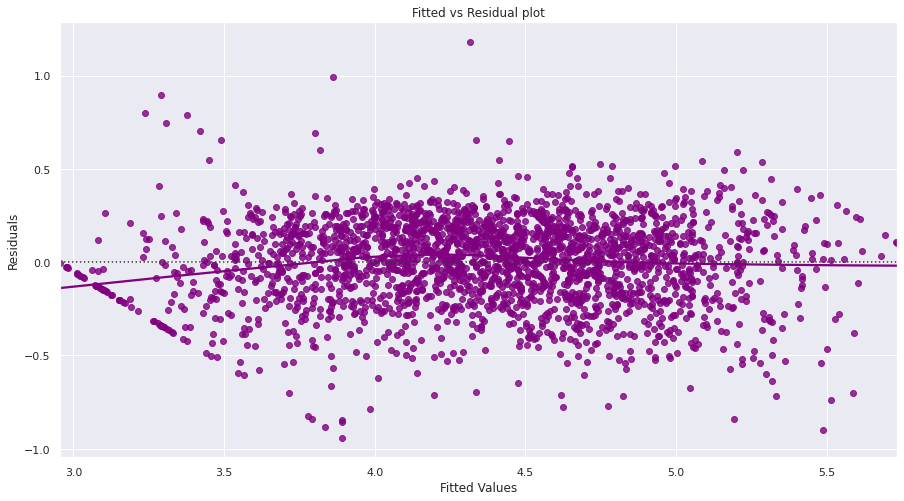

In [ ]:
# Now we will plot the fitted values vs residuals

# Below is used to plot the figure size as per dimensions
plt.figure(figsize=(15,8))


sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True)

plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")

plt.show()

####Observations####

1.   The pattern indicates that purple line is almost close to the dotted line, the linearity holds to be reasonably well .As, we move to the right the spread of residuals is not increasing.
2.   The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).



TEST FOR NORMALITY



1.   The shape of the histogram of residuals can give an initial idea about the normality
2.   It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not

3.    Other tests to check for normality includes the Shapiro-Wilk test

4.    *   Null hypothesis: Residuals are normally distributed
      *   Alternate hypothesis: Residuals are not normally distributed




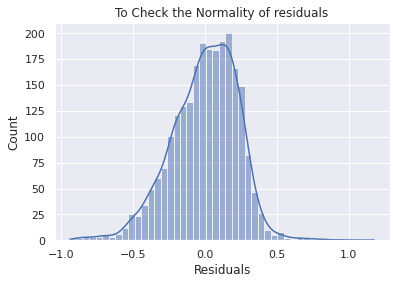

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("To Check the Normality of residuals")
plt.show()

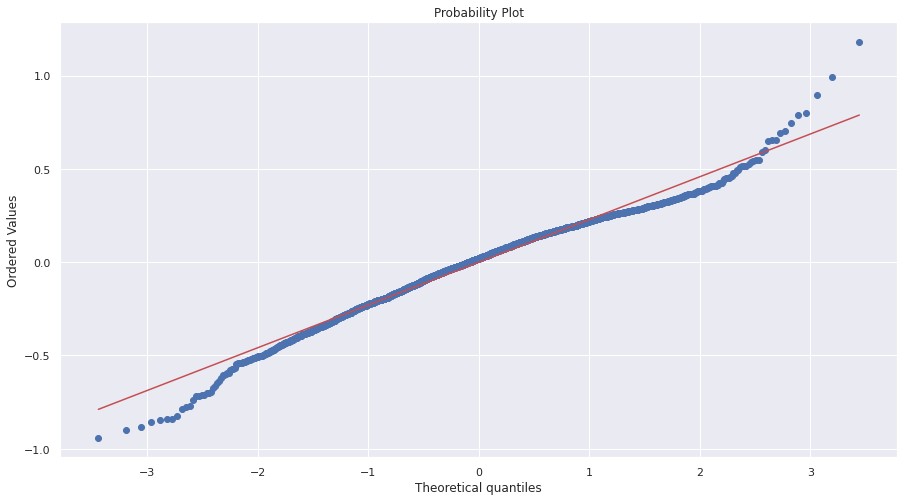

In [ ]:
import pylab
import scipy.stats as stats

# Below is used to plot the figure size as per dimensions
plt.figure(figsize=(15,8))

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()


####Observations####

1.   The residuals more or less follow a straight line except for the tails.
2.   Let's check the results of the Shapiro-Wilk test.



In [ ]:
from scipy.stats import shapiro

shapiro_test = stats.shapiro(df_pred["Residuals"])

print (shapiro_test)
print (" ")
print ("converted value for the scientific notation of p-value is {:.10f}".format(float(shapiro_test.pvalue)))

ShapiroResult(statistic=0.9818366765975952, pvalue=5.0576188388044014e-17)
 
converted value for the scientific notation of p-value is 0.0000000000


####Observations####

Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test. Strictly speaking, the residuals are not normal. However, as an approximation, we can accept this distribution as close to being normal. So, the assumption is satisfied.

TEST FOR HOMOSCEDASTICITY



1.   The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic
2.   *   Null hypothesis: Residuals are homoscedastic
     *   Alternate hypothesis: Residuals have heteroscedasticity




In [ ]:
# goldfeldquandt test for homoscedasticity

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train6)
lzip(name, test)

[('F statistic', 1.0188294209827595), ('p-value', 0.37351051685518283)]

####Observations####

1.   Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.



In [ ]:
# predictions on the test set
pred = olsmod2.predict(x_test6)

df_pred_test = pd.DataFrame({"Actual": y_test**(3), "Predicted": pred**(3)})
print("Sample of Actual and Predicted used_price by the ML model")
df_pred_test.sample(10, random_state=1)

Sample of Actual and Predicted used_price by the ML model


,Actual,Predicted
1174,94.430815,89.310020
2247,81.238798,65.069182
2991,73.078043,65.513278
2997,79.009214,82.375204
2982,100.529127,102.720587
479,78.660741,73.633464
17,109.011245,111.948491
471,105.280149,86.430669
2918,90.069046,90.618925
602,57.177211,68.427388


## Final Model

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train6).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.833
Model:                               OLS   Adj. R-squared:                  0.832
Method:                    Least Squares   F-statistic:                     1089.
Date:                   Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                           19:03:12   Log-Likelihood:                 113.19
No. Observations:                   2417   AIC:                            -202.4
Df Residuals:                       2405   BIC:                            -132.9
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

## Actionable Insights and Recommendations

*   All of the assumptions for linear regression were met for the model - multicollinearity or predictor VIFs less than 5, normality of error terms and homoscedasticity.
*   The linear predictive model is able to predict the normalized_used_price of the devices, explaining ~83% of the variance in the data, within a mean absolute percentage error of ~4.2%. The model is hence good.
*  4g is significant parameter, with 4g marginally contributing positively and to normalized_used_price , as expected.
*  weight, int_memory, selfie_camera_mp, main_camera_mp are contributing postively to the model .
*  Celkon brand is negatively correlated and less demand in customers.
* RAM for the refurbished phones was found to be constant ~4GB on average across the dataset.
* It is also observed that  almost 90% of phones were found to be operating on Android os, also insignificant factor for prediction.
* It is observed that weight and the battery are not heavily correlated .
* It is observedd that only android have the capacity of the 4g and 5g features and not any other operating systems.
* It is obsserved that microsoft and Xiaomi have moderate correlation with the refurished used price phones.
* It is good to have other brands/ OS apart from android also focus on the 5g as it could be one of driving factors .







___